In [2]:
import numpy as np
import scipy.integrate
import  matplotlib.pyplot  as  plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
from sympy.plotting import plot,plot_parametric,PlotGrid,plot3d_parametric_line
from sympy import *
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (18,18)
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,8)
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 20

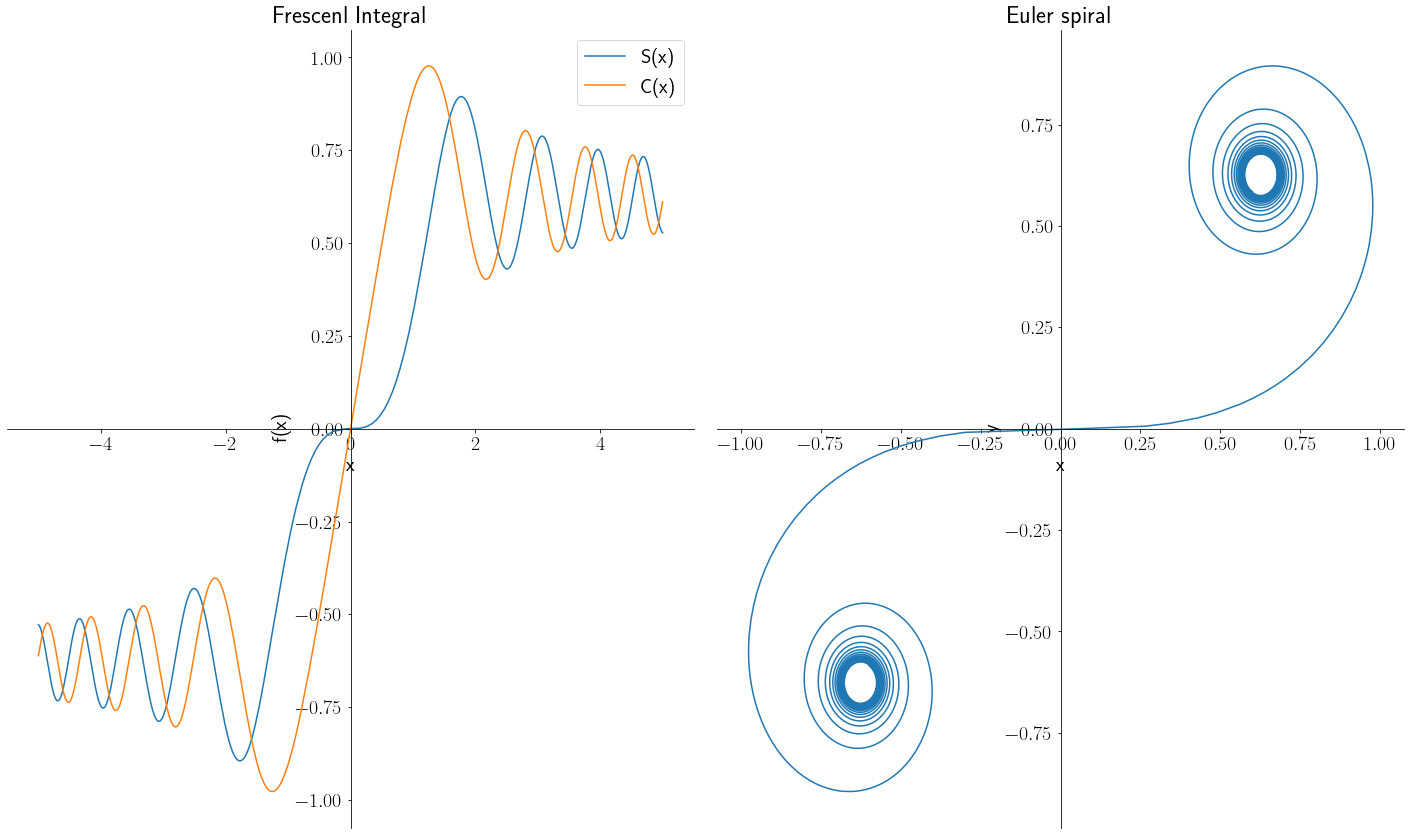

In [20]:
x,n,u = symbols('x n u')

def S(x):
    return summation((-1)**n * x**(4*n+3)/(factorial(2*n+1)*(4*n+3)), (n, 0, oo))
def C(x):
    return summation((-1)**n * x**(4*n+1)/(factorial(2*n)*(4*n+1)), (n, 0, oo))   

S1= plot(S(x),(x,-5,5),legend=True,label=('S(x)'),show=False,title='Frescenl Integral')
C1= plot(C(x),(x,-5,5),legend=True,label=('C(x)'),show=False,xlabel='x')
S1.extend(C1)
P=plot_parametric((C(x),S(x)),(x,-10,10),show=False,axis=True,xlabel='x',ylabel='y',title='Euler spiral ')
PlotGrid(1,2, S1, P, size=(20,12))

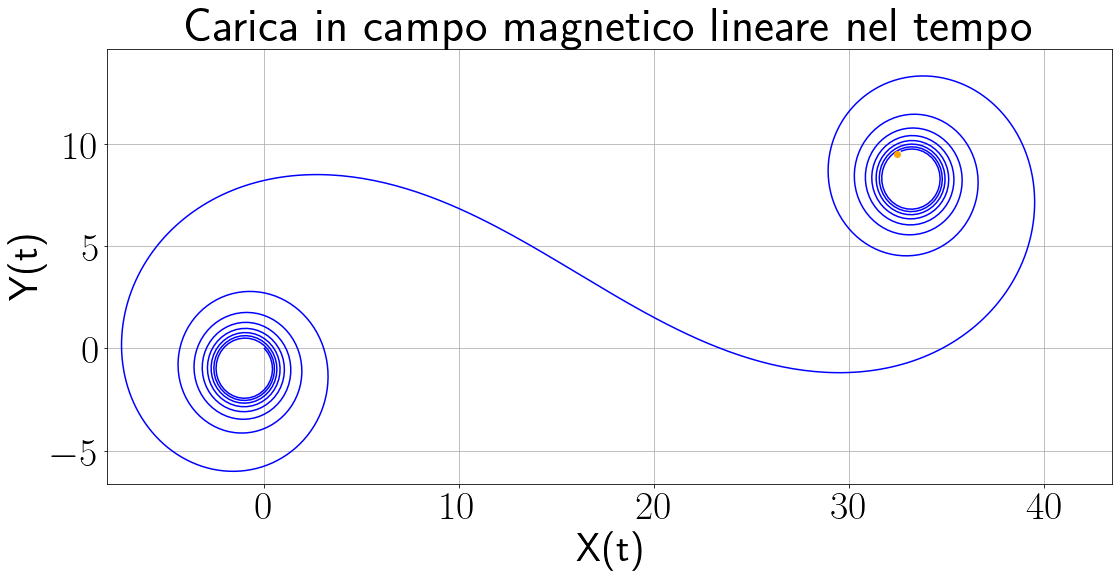

In [17]:
def f(y, t, b, c):
    x, u, z, v = y        #vettore con le incognite
    dydt = [u, b*t*v, -v, -c*t*u] #vettore parte di destra
    return dydt


b,c=1,1
x0 = [0, 10, 0, 10]     #condizioni iniziali;in ordine: x(0), x(0)', y(0), y(0)',
t = np.linspace(-10, 10, 1000)    #tempo su cui vuoi integrare (in sintesi i passetti)
sol = scipy.integrate.odeint(f, x0, t, args=(b, c))

x = sol[:, 0]
y = sol[:, 2]

fig = plt.figure(2)
plt.xlim(np.min(x*1.1),np.max(x*1.1))
plt.ylim(np.min(y*1.1),np.max(y*1.1))
line, = plt.plot([],[],'b-')
dot, = plt.plot([], [], color='orange',marker='o')

def animate(i):
    dot.set_data(x[i],y[i])
    line.set_data(x[:i],y[:i])
    return  dot, line


ani = animation.FuncAnimation(fig, animate, frames=range(0, 10**3, 10),interval=10, blit=True, repeat=True)
plt.grid()
plt.title('Carica in campo magnetico lineare nel tempo')
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
HTML(ani.to_jshtml())

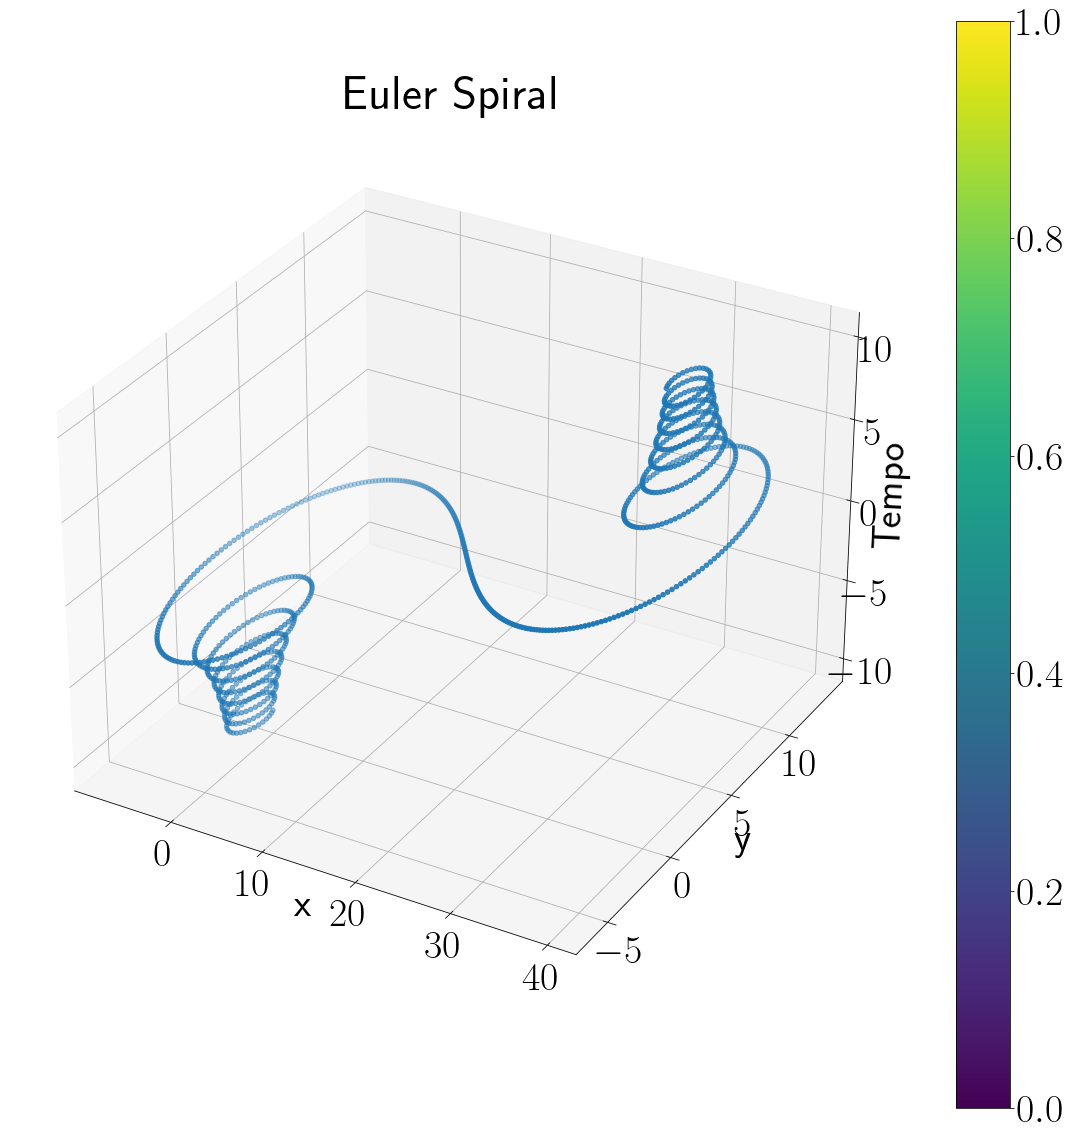

In [8]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
s=ax.scatter(sol[:, 0], sol[:, 2], t,cmap = plt.get_cmap('spring')) # plot in ordine: x, y, z.
ax.set_title('Euler Spiral')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Tempo')

plt.colorbar(s)
plt.show()

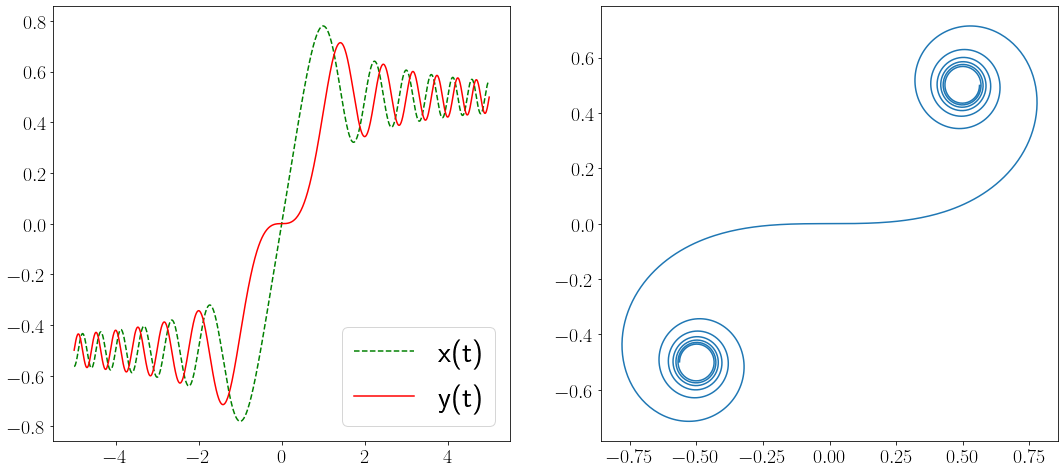

In [3]:
from scipy.special import fresnel
from scipy import linspace
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)
y, x = fresnel(t)

t = np.linspace(-5, 5, 1000)
y, x = fresnel(t)

plt.subplot(121)
plt.plot(t,x,'g--', t,y,'r')
plt.legend(['x(t)','y(t)'],fontsize=30,loc='lower right')
plt.subplot(122)
plt.plot(x, y)
plt.show()

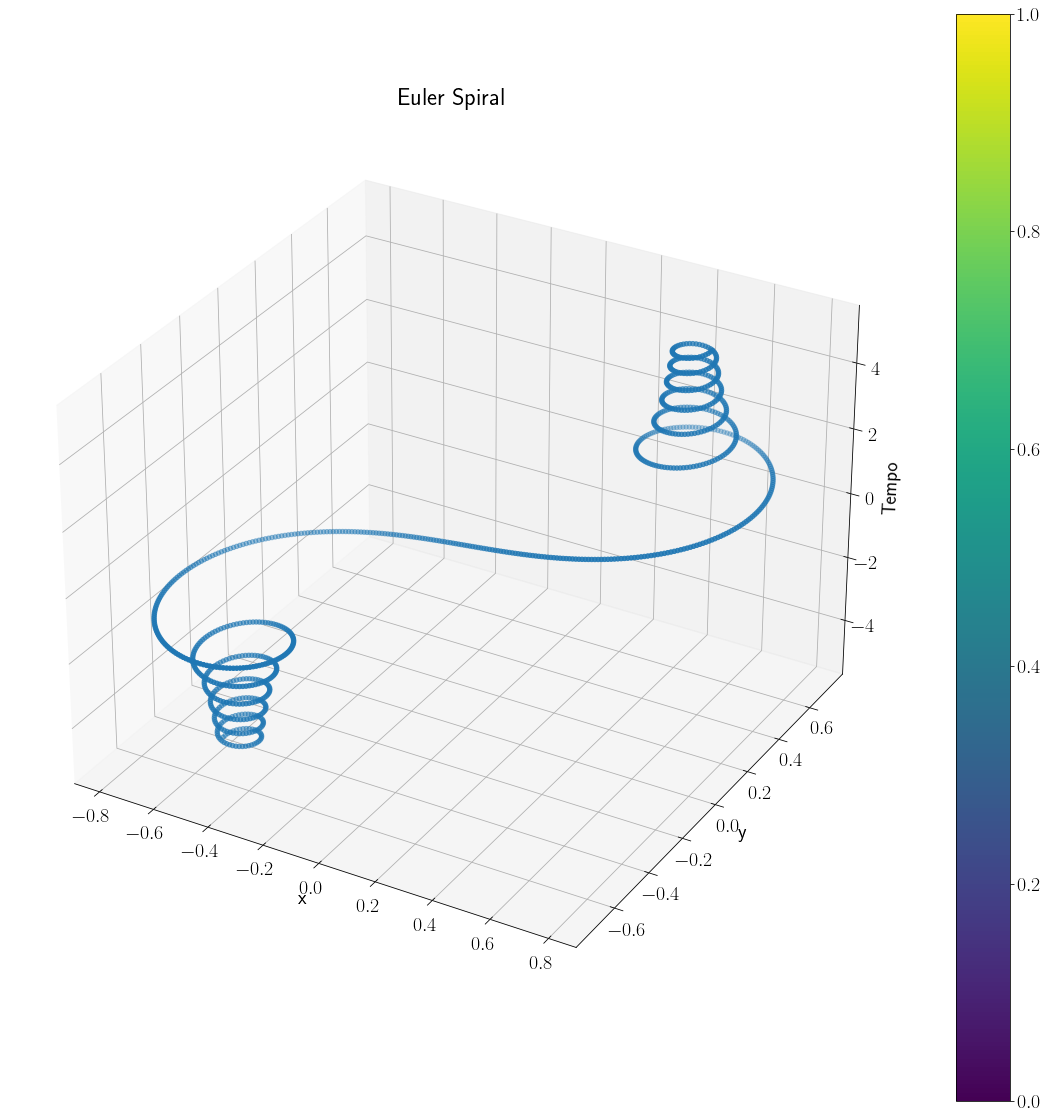

In [4]:
fig = plt.figure(figsize=(20,20))
t = np.linspace(-5, 5, 1000)
y, x = fresnel(t)
ax = fig.gca(projection='3d')
s=ax.scatter(x,y, t,cmap = plt.get_cmap('spring')) # plot in ordine: x, y, z.
ax.set_title('Euler Spiral')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Tempo')

plt.colorbar(s)
plt.show()